In [6]:
# -------- REAL DATA --------
# Test should be 1k 
# Validation should be 1
# Training should be 3k

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the contents of the text files
with open('groundTruthTRAIN.txt', 'r') as f:
    train_data = f.readlines()

with open('groundTruthtest.txt', 'r') as f:
    test_data = f.readlines()

# Function to parse the data and extract image paths and labels
def parse_data(data, folder_name):
    image_paths = []
    labels = []
    for line in data:
        if line.startswith("Image:"):
            image_path = folder_name + '/' + line.split(":")[1].strip()
            image_paths.append(image_path)
        elif line.startswith("GroundTruth:"):
            label = line.split(":")[1].strip()
            labels.append(label)
    return image_paths, labels

# Parse train and test data
train_image_paths, train_labels = parse_data(train_data, 'train')
test_image_paths, test_labels = parse_data(test_data, 'test')

# Correct the image paths to avoid duplication of folder names
train_image_paths = [path.replace('train/train', 'train') for path in train_image_paths]
test_image_paths = [path.replace('test/test', 'test') for path in test_image_paths]

# Combine train and test data for splitting
all_image_paths = train_image_paths + test_image_paths
all_labels = train_labels + test_labels

# Split data into train (3000), validation (1000), and test (1000)
train_paths, temp_paths, train_labels, temp_labels = train_test_split(
    all_image_paths, all_labels, train_size=3000, random_state=42)

validation_paths, test_paths, validation_labels, test_labels = train_test_split(
    temp_paths, temp_labels, test_size=1000, random_state=42)

# Create separate dataframes for train, validation, and test data
train_df = pd.DataFrame({'image_path': train_paths, 'label': train_labels})
validation_df = pd.DataFrame({'image_path': validation_paths, 'label': validation_labels})
test_df = pd.DataFrame({'image_path': test_paths, 'label': test_labels})

# Create dictionaries for train, validation, and test data
train_label_dict = train_df.set_index('image_path').to_dict()['label']
validation_label_dict = validation_df.set_index('image_path').to_dict()['label']
test_label_dict = test_df.set_index('image_path').to_dict()['label']

# Save the dataframes to CSV files
train_df.to_csv('train_image_labels.csv', index=False)
validation_df.to_csv('validation_image_labels.csv', index=False)
test_df.to_csv('test_image_labels.csv', index=False)

In [8]:
# Print the lengths
train_length = len(train_df)
validation_length = len(validation_df)
test_length = len(test_df)
combined_length = train_length + validation_length + test_length

print("Train dataset length:", train_length)
print("Validation dataset length:", validation_length)
print("Test dataset length:", test_length)
print("Combined dataset length:", combined_length)
print("Train label dictionary length:", len(train_label_dict))
print("Validation label dictionary length:", len(validation_label_dict))
print("Test label dictionary length:", len(test_label_dict))

# Print the first 5 entries of the dictionaries
train_label_dict_first_5 = dict(list(train_label_dict.items())[:5])
validation_label_dict_first_5 = dict(list(validation_label_dict.items())[:5])
test_label_dict_first_5 = dict(list(test_label_dict.items())[:5])

print("\nFirst 5 entries of the Train Label Dictionary:")
for key, value in train_label_dict_first_5.items():
    print(f"{key}: {value}")

print("\nFirst 5 entries of the Validation Label Dictionary:")
for key, value in validation_label_dict_first_5.items():
    print(f"{key}: {value}")

print("\nFirst 5 entries of the Test Label Dictionary:")
for key, value in test_label_dict_first_5.items():
    print(f"{key}: {value}")

Train dataset length: 3000
Validation dataset length: 1000
Test dataset length: 1000
Combined dataset length: 5000
Train label dictionary length: 3000
Validation label dictionary length: 1000
Test label dictionary length: 1000

First 5 entries of the Train Label Dictionary:
test/739_3.png: TO
train/5080_22.png: MEN
train/2383_5.png: MOOD
train/2626_3.png: 32
test/5027_6.png: COMEDIE

First 5 entries of the Validation Label Dictionary:
test/433_6.png: BANKING
test/2036_1.png: CHANGE
train/819_1.png: ISNT
test/2599_2.png: 020
test/688_6.png: COP

First 5 entries of the Test Label Dictionary:
train/995_1.png: THATS
train/2192_3.png: FUTURE
test/1065_6.png: M
train/5017_11.png: RICHARD
train/958_2.png: BANKING


(24, 57, 3)


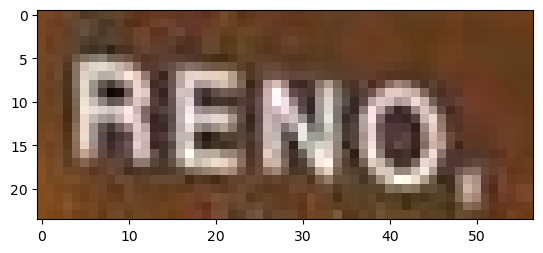

In [10]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('train/2463_1.png')

cv2.imshow('image', img)
plt.imshow(img)
print(img.shape)